La loi entrée-sortie est de la forme : 
$$\left(L_0 + L_1 \cos \theta_1 -L_2\cos \theta_3\right)^2 + \left( L_1\sin \theta_1-L_2 \sin \theta_3\right)^2=L_2^2 $$

$\theta_1$ est le mouvement moteur. On peut donc faire un choix d'évolution temporelle, par exemple $\theta_1(t)=t$. 

Pour $\theta_2$ il faut résoudre $\left(L_0 + L_1 \cos \theta_1 -L_2\cos \theta_3\right)^2 + \left( L_1\sin \theta_1-L_2 \sin \theta_3\right)^2-L_2^2 = 0$ pour chaque $\theta_1$.

  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import math as m
N = 1000

L_0,L_1,L_2 = 50,25,62.5
les_temps = np.linspace(0,4*np.pi,N)
les_theta_1 = np.linspace(0,4*np.pi,N)

def f(theta_3):
    return (L_0+L_1*np.cos(theta_1)-L_2*np.cos(theta_3))**2 + (L_1*np.sin(theta_1)-L_2*np.sin(theta_3))**2-L_2**2


Pour l'algorithme de Newton, il est nécéssaire de trouver une valeur proche de la solution.
![Epure Geogebra](geogebra-export.png)

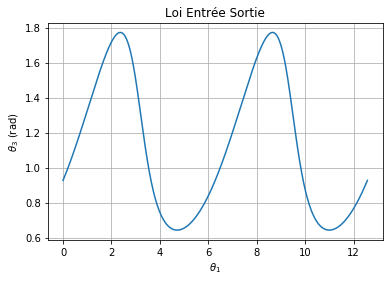

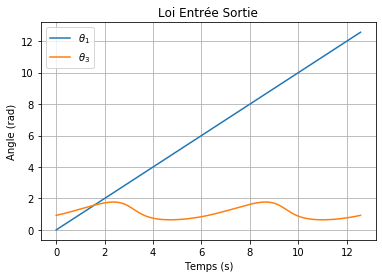

In [2]:
theta_1 = 0
x=scipy.optimize.newton(f,np.radians(53))
les_theta_3 = [x]

for i in range(1,len(les_theta_1)):
    theta_1 = les_theta_1[i]
    x=scipy.optimize.newton(f,les_theta_3[-1])
    les_theta_3.append(x)
    #print(i, " sol=",x, " th1=",m.degrees(theta_1), " th3=",m.degrees(les_theta_3[-1]))

plt.plot(les_theta_1,les_theta_3)
plt.xlabel('$\\theta_1$')
plt.ylabel('$\\theta_3$ (rad)')
plt.title('Loi Entrée Sortie')
plt.grid(True)
plt.show()
plt.clf()
plt.plot(les_temps,les_theta_1)
plt.plot(les_temps,les_theta_3)
plt.xlabel('Temps (s)')
plt.ylabel('Angle (rad)')
plt.title('Loi Entrée Sortie')
plt.legend(("$\\theta_1$","$\\theta_3$"))
plt.grid(True)
plt.show()

Trajectoire du point $E$. 
$\overrightarrow{AE}=\begin{pmatrix} 
    L_0+L_1 \cos \theta_1 -2L_2\cos \theta_3 \\    
    L_1 \sin \theta_1 -2L_2 \sin \theta_3
  \end{pmatrix}_{R_0}$

In [3]:
les_xE = L_0+L_1*np.cos(les_theta_1)-2*L_2*np.cos(les_theta_3)
les_yE = L_1*np.sin(les_theta_1)-2*L_2*np.sin(les_theta_3)

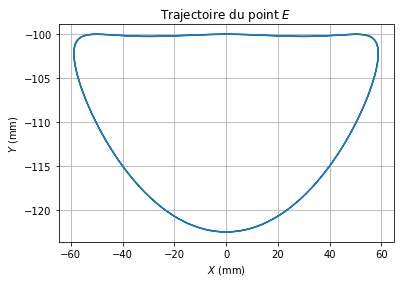

In [4]:
plt.clf()
plt.plot(les_xE,les_yE)
plt.xlabel('$X$ (mm)')
plt.ylabel('$Y$ (mm)')
plt.title('Trajectoire du point $E$')
#plt.legend(("$\\theta_1$","$\\theta_3$"))
plt.grid(True)
plt.show()

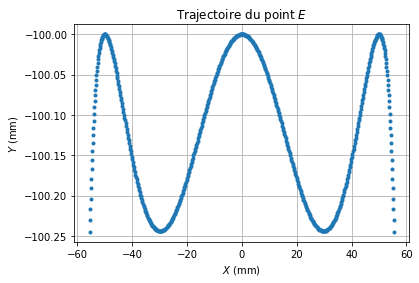

In [5]:
les_xE_bis = []
les_yE_bis = []
for i in range(len(les_yE)):
    if les_yE[i]>-100.25:
        les_xE_bis.append(les_xE[i])
        les_yE_bis.append(les_yE[i])

plt.clf()
plt.plot(les_xE_bis,les_yE_bis,'.')
plt.xlabel('$X$ (mm)')
plt.ylabel('$Y$ (mm)')
plt.title('Trajectoire du point $E$')

plt.grid(True)
plt.show()

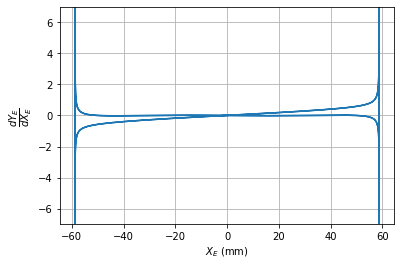

In [6]:
# Plot des dY/dX
dY_dX=[]
for i in range (1,len(les_xE)):
    dY_dX.append((les_yE[i]-les_yE[i-1])/(les_xE[i]-les_xE[i-1]))
plt.plot(les_xE[1:],dY_dX)
plt.ylim(-7,7)
#plt.xlabel('$dfrac{\\text{d}Y_E}{\\text{d}X_E}}$ ')
plt.ylabel('$\\dfrac{ d Y_E}{d X_E}$ ')
plt.xlabel('$X_E$ (mm)')
plt.grid('show')
plt.show()
    

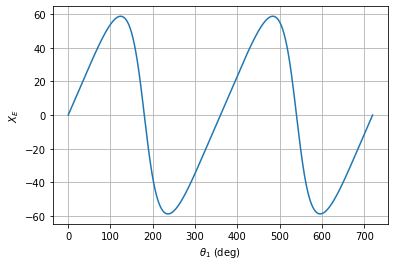

In [7]:
plt.plot(np.degrees(les_theta_1),les_xE)

plt.ylabel('$X_E$ ')
plt.xlabel('$\\theta_1$ (deg)')
plt.grid('show')
plt.show()

Couple proposé dans le sijet 
$C_m = \dfrac{L_1 F}{\sin \left(\theta_2 - \theta_3\right)}\left( \sin \theta_1 \sin\left( \theta_2+\theta_3 \right)  -2\cos \theta_1 \sin\theta_2\sin\theta_3\right)$

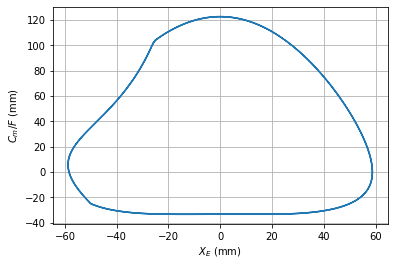

In [8]:
F=1
les_theta_2 = np.arcsin((L_1*np.sin(les_theta_1)-L_2*np.sin(les_theta_3))/L_2)
C_m = (L_1*F)/(np.sin(les_theta_2 - les_theta_3))*(np.sin(les_theta_1)*np.sin(les_theta_2+les_theta_3)-2*np.cos(les_theta_1)*np.sin(les_theta_2)*np.sin(les_theta_3))


plt.plot(les_xE,C_m)
plt.xlabel('$X_E$ (mm) ')
plt.ylabel('$C_m/F$ (mm)')
plt.grid('show')
plt.show()

$C_m(t)= 2F(t) L_1\dfrac{\sin \theta_2\sin\theta_3}{\sin \left(\theta_3-\theta_2 \right)}\left(-\sin \theta_1+  \cos \theta_1\right) $ 

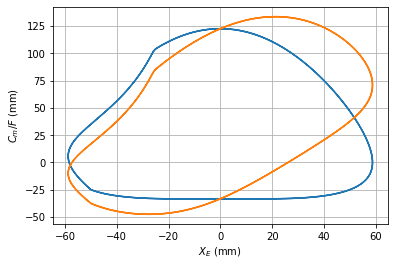

In [11]:
Cm= 2*L_1*(np.sin(les_theta_2)*np.sin(les_theta_3))/(np.sin(les_theta_3-les_theta_2))*(-np.sin(les_theta_1)+np.cos(les_theta_1))


plt.plot(les_xE,C_m)

plt.plot(les_xE,Cm)

plt.xlabel('$X_E$ (mm) ')
plt.ylabel('$C_m/F$ (mm)')
plt.grid('show')
plt.show()